/var/folders/fc/fs9j8_5j73v0dccgsvwrdxmc0000gn/T/ipykernel_13753/990500024.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


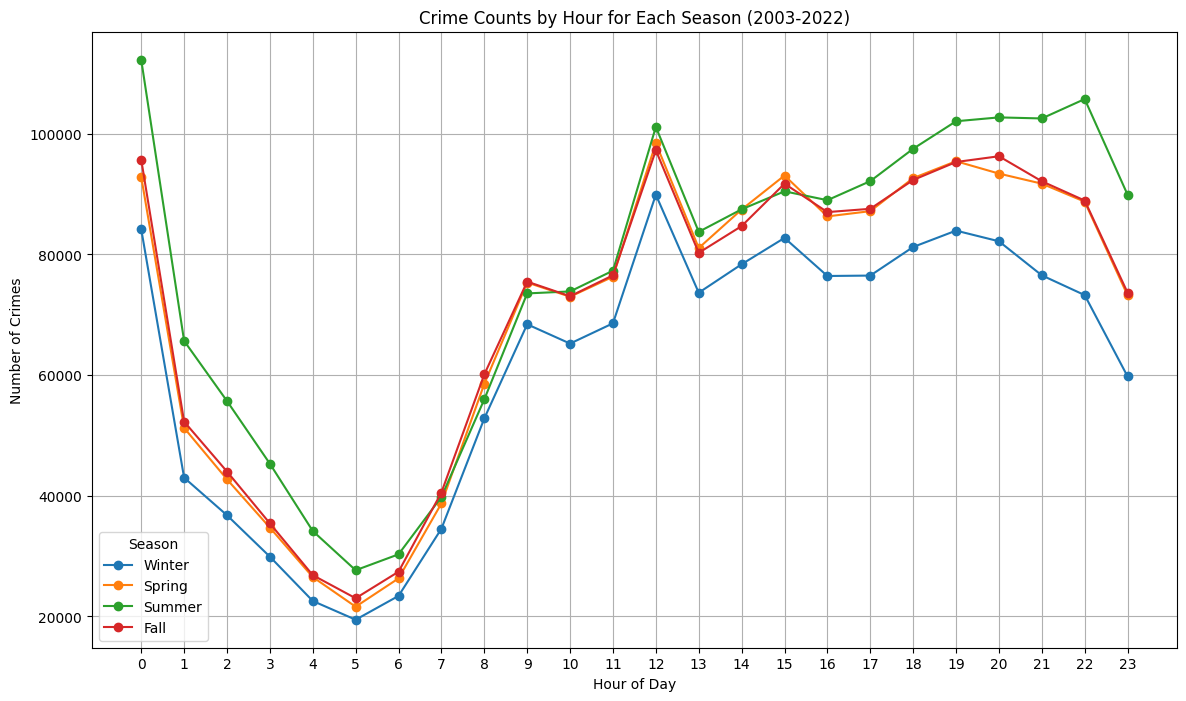

In [1]:
# 02_Hourly_Seasonal_Plots.ipynb

# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the Cleaned Data ---
df = pd.read_csv('../data/CleanedCrime.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# --- Filter to 2003-2022 ---
df = df[(df['Date'].dt.year >= 2003) & (df['Date'].dt.year <= 2022)]

# --- Create Season Column ---
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Date'].apply(get_season)

# --- Extract Hour from Date ---
df['Hour'] = df['Date'].dt.hour

# --- Group by Season and Hour ---
season_hourly = df.groupby(['Season', 'Hour']).size().reset_index(name='Crime_Count')

# --- Plot: Line plot for each season ---
plt.figure(figsize=(14,8))

# Loop through seasons and plot each one
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
for season in seasons:
    subset = season_hourly[season_hourly['Season'] == season]
    plt.plot(subset['Hour'], subset['Crime_Count'], marker='o', label=season)

plt.title('Crime Counts by Hour for Each Season (2003-2022)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 24))  # 0 to 23 hours
plt.grid(True)
plt.legend(title='Season')
plt.show()


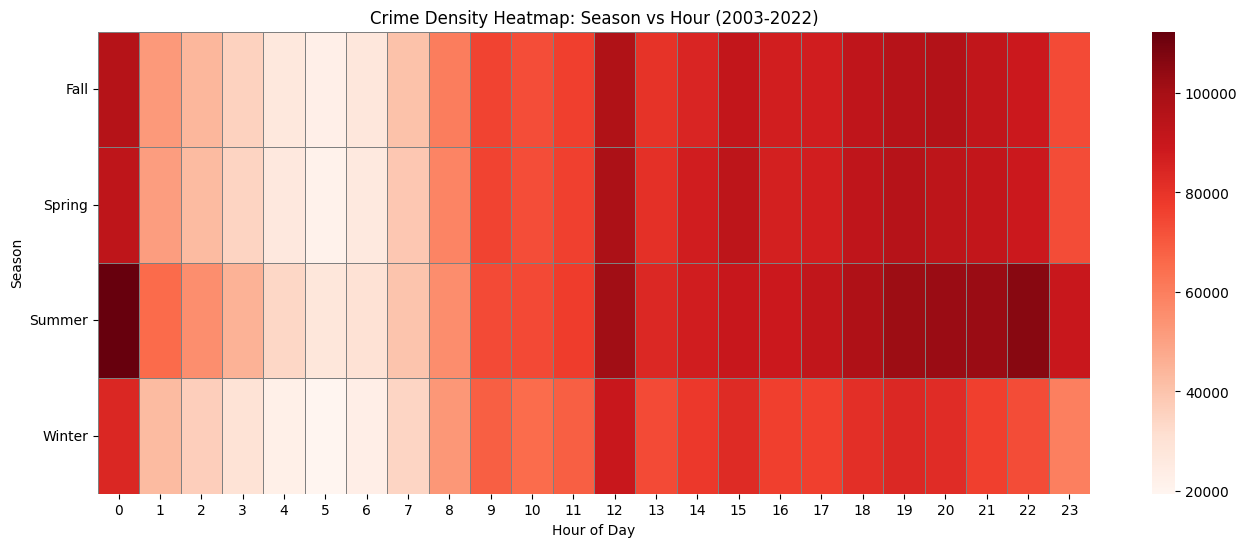

In [2]:
# --- Prepare data for Heatmap ---
# Pivot the data to have Seasons as rows, Hours as columns
pivot_table = season_hourly.pivot(index='Season', columns='Hour', values='Crime_Count')

# --- Plot Heatmap ---
plt.figure(figsize=(16, 6))
sns.heatmap(pivot_table, cmap='Reds', linewidths=0.5, linecolor='gray', annot=False)

plt.title('Crime Density Heatmap: Season vs Hour (2003-2022)')
plt.xlabel('Hour of Day')
plt.ylabel('Season')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()


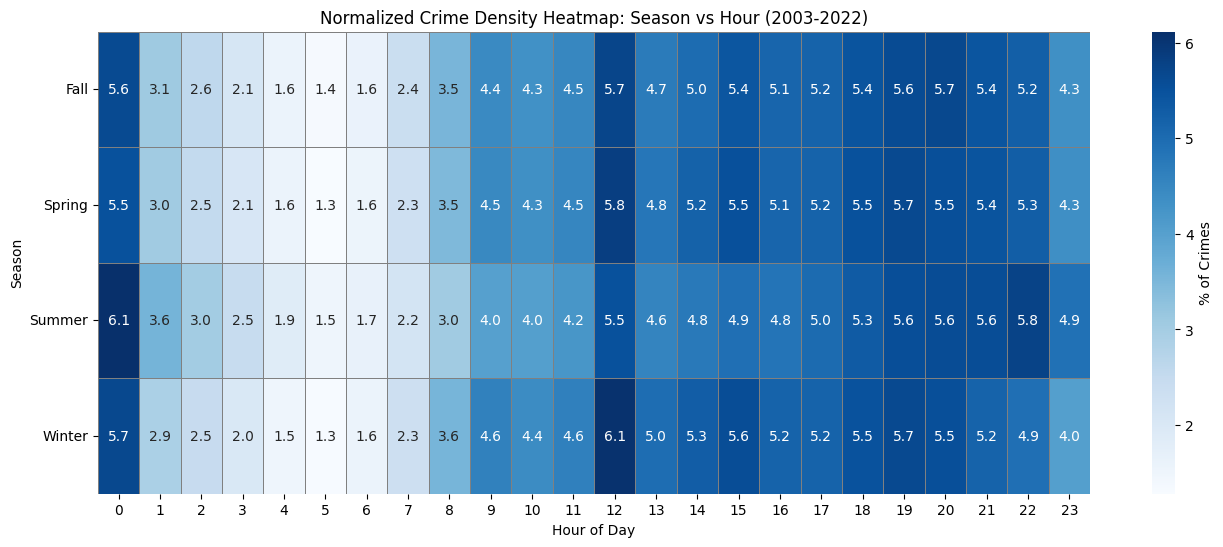

In [3]:
# --- Normalize by season (row) ---
pivot_normalized = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100  # Percentage

# --- Plot Normalized Heatmap ---
plt.figure(figsize=(16, 6))
sns.heatmap(pivot_normalized, cmap='Blues', linewidths=0.5, linecolor='gray', annot=True, fmt='.1f', cbar_kws={'label': '% of Crimes'})
plt.title('Normalized Crime Density Heatmap: Season vs Hour (2003-2022)')
plt.xlabel('Hour of Day')
plt.ylabel('Season')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()
